In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
!ls

KNNClassifier_Illustration.ipynb Social_Network_Ads.csv
KNN_Python.py


In [134]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [135]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [137]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [138]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2) 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[51  7]
 [ 5 37]]


In [139]:
def plot_decision_boundry(X,y):
	from matplotlib.colors import ListedColormap
	X_set, y_set = X, y
	X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
	                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
	plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
	             alpha = 0.75, cmap=ListedColormap(('white', 'yellow')))
	plt.xlim(X1.min(), X1.max())
	plt.ylim(X2.min(), X2.max())
	for i, j in enumerate(np.unique(y_set)):
	    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
	                c = ListedColormap(('red', 'green'))(i), label = j)
	plt.title('Classifier (Training set)')
	plt.xlabel('Age')
	plt.ylabel('Estimated Salary')
	plt.legend()
	plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


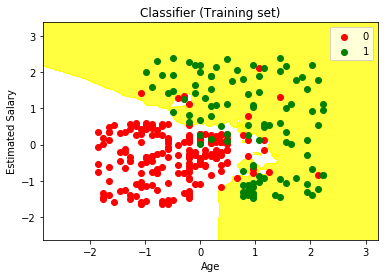

In [140]:
# visualising the decision Boundry
plot_decision_boundry(X_train,y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


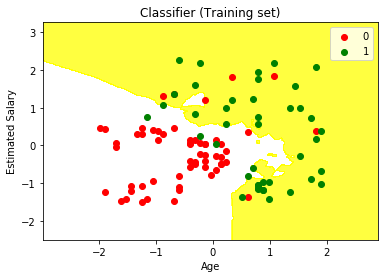

In [141]:
plot_decision_boundry(X_test,y_test)